This dataset will attempt to answer the following questions:

1. Which companies pay the highest salaries?
2. Do men earn more than women in the tech industry?
3. Is there a correlation between education and salary?
4. Is there a correlation between years of experience and salary?
5. Is there a correlation between years at a company and salary?
6. Is there a correlation between race and salary?
7. Where are the tech jobs located?

salary -> totalyearlycompensation

In [1]:
# import required libraries for performing EDA and data cleaning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# q: how to disable warnings?
# a: use warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')


In [5]:
# import Levels_Fyi_Salary_Data.csv file

df = pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [6]:
# print all the columns in the dataset
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [8]:
df.shape

(3755, 11)

In [10]:
# print unique values in job title column
df['job_title'].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [29]:
# drop columns which are not required for analysis from the new dataframe
todo = ['work_year']
to_be_drop = ['experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size']
to_be_drop = to_be_drop + todo
new_df.drop(to_be_drop, axis=1, inplace=True)

In [30]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2578 entries, 419 to 62623
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  2578 non-null   object 
 1   totalyearlycompensation  2578 non-null   int64  
 2   location                 2578 non-null   object 
 3   yearsofexperience        2578 non-null   float64
 4   yearsatcompany           2578 non-null   float64
 5   basesalary               2578 non-null   float64
 6   stockgrantvalue          2578 non-null   float64
 7   bonus                    2578 non-null   float64
 8   gender                   1740 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 201.4+ KB


In [31]:
# drop rows which has null values
new_df.dropna(inplace=True)

In [32]:
new_df.head()

,company,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender
419,LinkedIn,233000,"San Francisco, CA",4.0,0.0,162000.0,220000.0,10000.0,Male
440,Microsoft,218000,"Seattle, WA",11.0,11.0,165000.0,28000.0,23000.0,Male
444,ebay,180000,"San Jose, CA",10.0,5.0,0.0,0.0,0.0,Female
454,Twitter,500000,"San Francisco, CA",4.0,4.0,200000.0,280000.0,20000.0,Male
495,Facebook,370000,"Seattle, WA",8.0,3.0,190000.0,140000.0,40000.0,Male


In [33]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1740 entries, 419 to 62529
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  1740 non-null   object 
 1   totalyearlycompensation  1740 non-null   int64  
 2   location                 1740 non-null   object 
 3   yearsofexperience        1740 non-null   float64
 4   yearsatcompany           1740 non-null   float64
 5   basesalary               1740 non-null   float64
 6   stockgrantvalue          1740 non-null   float64
 7   bonus                    1740 non-null   float64
 8   gender                   1740 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 135.9+ KB


In [35]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder

to_be_encoded = ['company','location','gender']

labelencoder_Y = LabelEncoder()
for i in to_be_encoded:
    new_df[i] = labelencoder_Y.fit_transform(new_df[i])

new_df.head()

,company,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender
419,189,233000,152,4.0,0.0,162000.0,220000.0,10000.0,1
440,210,218000,160,11.0,11.0,165000.0,28000.0,23000.0,1
444,355,180000,153,10.0,5.0,0.0,0.0,0.0,0
454,315,500000,152,4.0,4.0,200000.0,280000.0,20000.0,1
495,119,370000,160,8.0,3.0,190000.0,140000.0,40000.0,1


<AxesSubplot:>

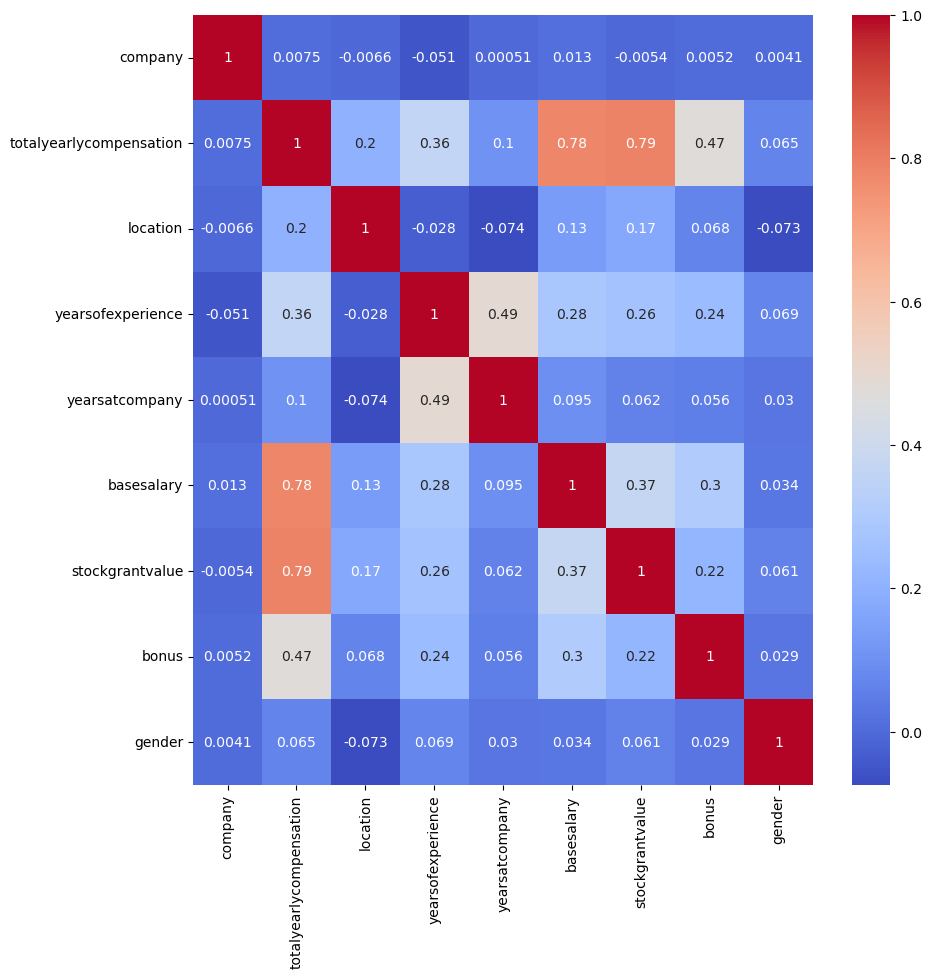

In [36]:
# Correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')

In [40]:
# drop basesalary column and stockgrantvalue column and store it in a new dataframe
new_df2 = new_df.drop(['basesalary','stockgrantvalue','bonus'], axis=1)

<AxesSubplot:>

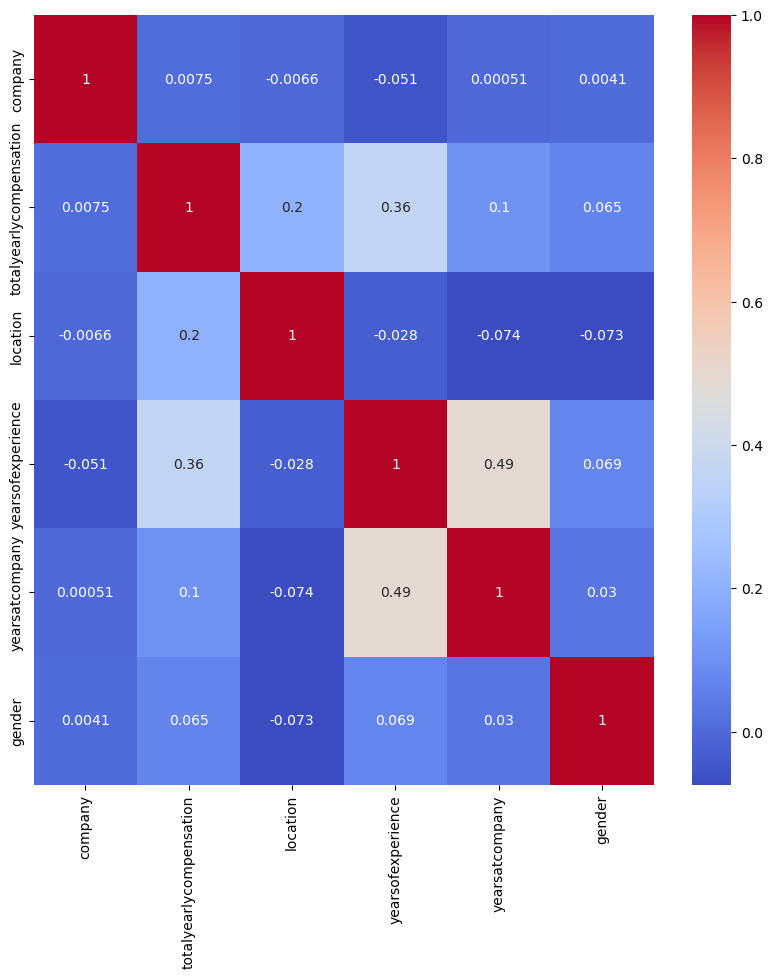

In [41]:
# Correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(new_df2.corr(), annot=True, cmap='coolwarm')

# How long does a typical tech worker stay at a company?

In [ ]:
number_of_years_at_company = new_df['yearsatcompany'].value_counts(ascending = False)\
                                                            .head(10)\
                                                            .sort_values(ascending = True)\
                                                            .plot.barh(figsize = (15,8));
plt.title('Number of Years at Company', size=17)
plt.xlabel('Worker Count', size = 15)
plt.ylabel('Years At The Company', size = 15)
plt.show(); 

# top 10 locations of data science jobs

In [ ]:
location = new_df['location'].value_counts(ascending = False).head(10).sort_values(ascending = True).plot.barh(figsize = (15,8))
plt.title('Top 10 locations of tech jobs', size=17)
plt.xlabel('Number of workers', size = 15)
plt.ylabel('Company', size = 15)
plt.show();